In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

#load data 
df = pd.read_csv('netflix_titles.csv')

#clean the data
df = pd.dropna(subset = ['type' , 'release_year' , 'rating' , 'country' , 'duration'])

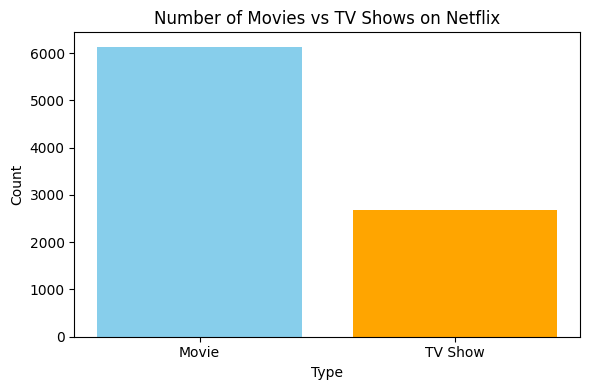

In [3]:
#SHOWING THE DATA OF MOVIES VS TV SHOWS
type_counts = df['type'].value_counts()
plt.figure(figsize = (6,4))
plt.bar(type_counts.index , type_counts.values , color = ['Skyblue' , 'orange'])
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

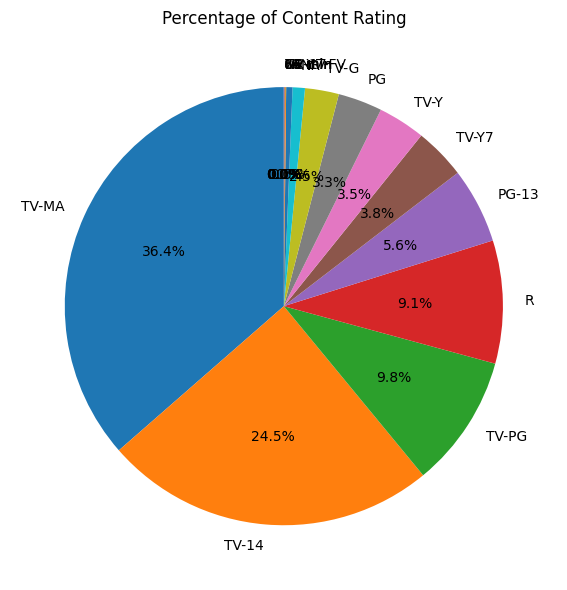

In [11]:
#CHECKING THE RATING OF MOVIES AND TV SHOWS BY PIE CHART
rating_counts = df['rating'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(rating_counts , labels = rating_counts.index , autopct = '%1.1f%%' , startangle = 90)
plt.title('Percentage of Content Rating')
plt.tight_layout()
plt.savefig('content_ratings_pie.png')
plt.show()

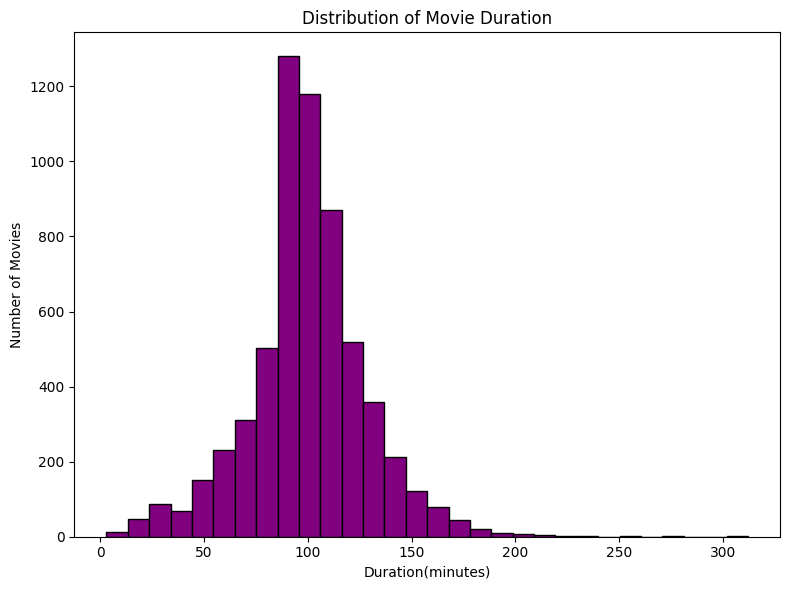

In [32]:
#MOVIE DURATION DISTRIBUTION BY HISTOGRAM 
movie_df = df[df['type'] == 'Movie'].copy()
movie_df = movie_df.dropna(subset=['duration']) 
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize = (8,6))
plt.hist(movie_df['duration_int'] , bins = 30 , color = 'purple' , edgecolor= 'black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration(minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movies_duration_histo.png')
plt.show()

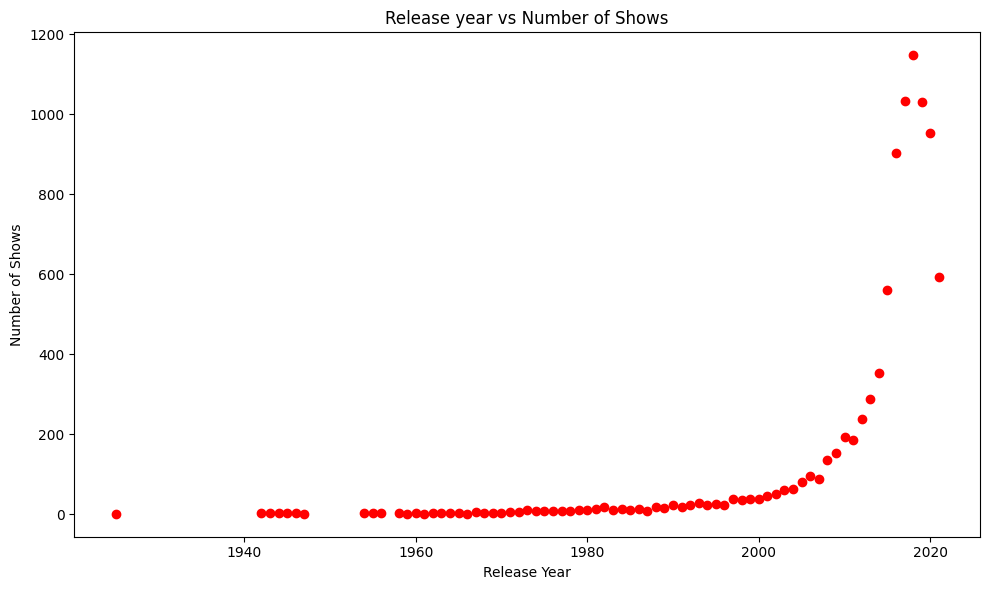

In [33]:
#RELEASE YEAR VS NUMBER OF SHOWS USING SCATTER PLOT
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.scatter(release_counts.index , release_counts.values , color = 'red')
plt.title('Release year vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

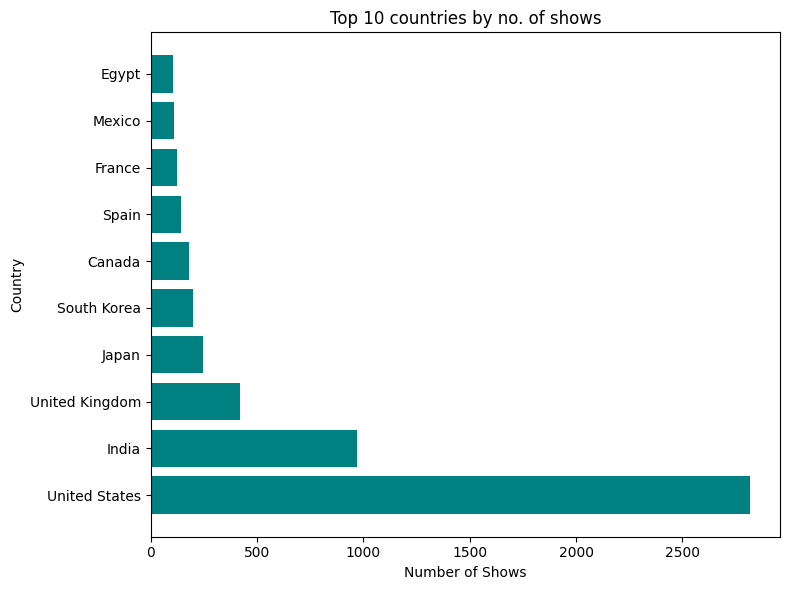

In [36]:
#TOP 10 COUNTRIES RELEASED SHOWS
country_counts =  df['country'].value_counts().head(10)
plt.figure(figsize = (8,6))
plt.barh(country_counts.index , country_counts.values , color = 'teal')
plt.title('Top 10 countries by no. of shows')
plt.ylabel('Country')
plt.xlabel('Number of Shows')
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()

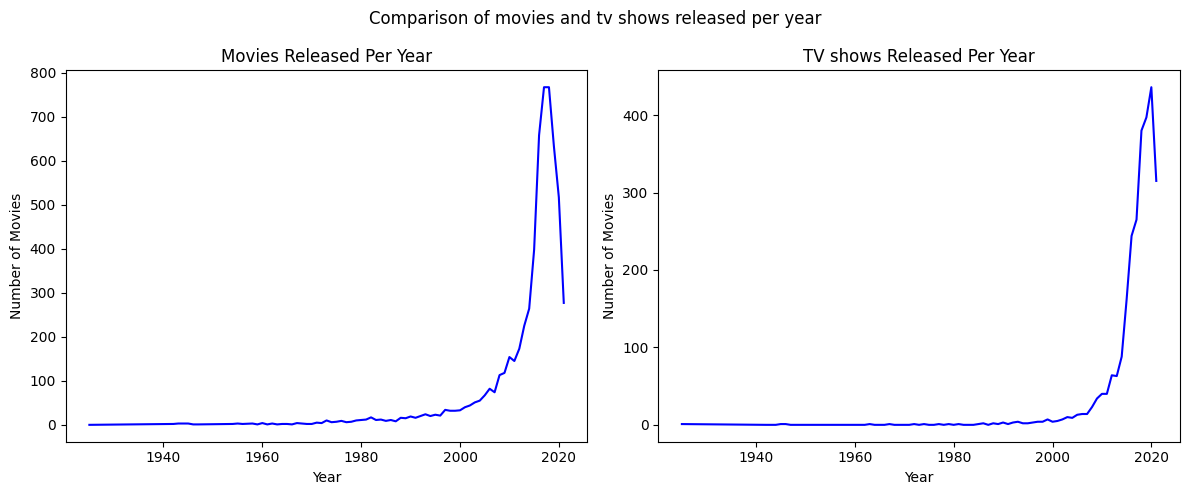

In [41]:
content_by_year = df.groupby(['release_year' , 'type']).size().unstack().fillna(0)
fig , ax = plt.subplots(1,2,figsize = (12,5))

#first subplot : movies 
ax[0].plot(content_by_year.index , content_by_year['Movie'] , color = 'blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot : TV shows 
ax[1].plot(content_by_year.index , content_by_year['TV Show'] , color = 'blue')
ax[1].set_title('TV shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Movies')

fig.suptitle('Comparison of movies and tv shows released per year')
plt.tight_layout()
plt.savefig('movies_vs_tvshows_comparison.png')
plt.show()